# Introduction

In this notebook, we will make a classification using the K-nearest neighbors(KNN) algorithm and the biomechanical features of orthopedic patients.

## 📋 **Biomechanical Features** 

Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine.
* pelvic incidence
* pelvic tilt
* lumbar lordosis angle
* sacral slope
* pelvic radius
* grade of spondylolisthesis

# K-Nearest Neighbors(KNN)

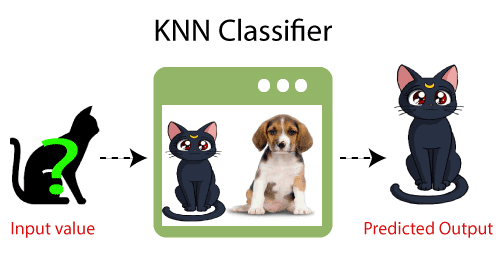

* K-Nearest Neighbours is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.



## Why do we need a KNN Algorithm?

Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. To solve this type of problem, we need a KNN algorithm. With the help of KNN, we can easily identify the category or class of a particular dataset. Consider the below diagram:

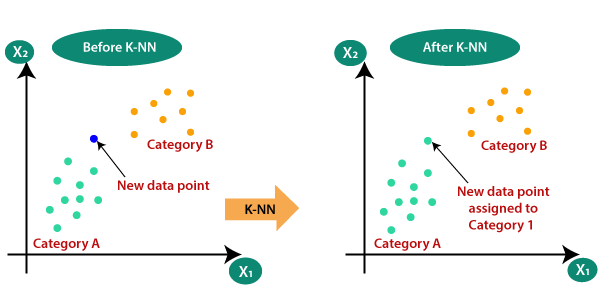

## How does KNN work?

The KNN working can be explained on the basis of the below algorithm:

1. Step: Select the number K of the neighbors
1. Step: Calculate the Euclidean distance of K number of neighbors
1. Step: Take the K nearest neighbors as per the calculated Euclidean distance.
1. Step: Among these K neighbors, count the number of the data points in each category.
1. Step: Assign the new data points to that category for which the number of the neighbor is maximum.
1. Step: Our model is ready.

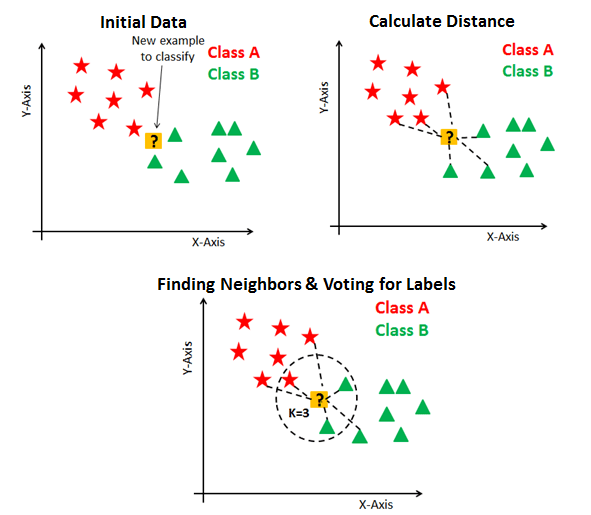


# Understanding Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.info()

In [ ]:
data["class"].value_counts()

In [ ]:
data.describe().T

# Visualization

In [ ]:
sns.countplot(x="class", data=data, palette="PRGn")
plt.title("Class")
plt.show()

In [ ]:
# Converting the class variable type from object to integer
data["class"] = [1 if each == 'Abnormal' else 0 for each in data["class"]]

In [ ]:
sns.countplot(x="class", data=data, palette="PRGn")
plt.title("Class")
plt.show()

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap="YlGn", linewidths=0.5, fmt= '.1f')
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot("pelvic_incidence" , y="sacral_slope" , hue="class" , palette="RdYlGn" , data=data);

In [ ]:
data.boxplot(figsize=(8,6),column='degree_spondylolisthesis',by ='class')
plt.show()

In [ ]:
data.boxplot(figsize=(8,6),column='pelvic_incidence',by ='class')
plt.show()

In [ ]:
sns.pairplot(data, hue="class", palette="RdYlGn")
plt.show()

# Prediction Using KNN

## Prepare Data

In [ ]:
x_data = data.drop(["class"],axis=1)
y = data["class"].values

In [ ]:
# Normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x

In [ ]:
# Train - Test Split
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.33,random_state=56)

In [ ]:
y_train.size

In [ ]:
y_test.size

## KNN Model 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
# Fit
knn.fit(x_train,y_train)

In [ ]:
# Predict
prediction = knn.predict(x_test) 

In [ ]:
prediction

In [ ]:
# prediction Countplot
sns.countplot(x=prediction, palette="summer")
plt.title("Prediction")
plt.show()

In [ ]:
# y_test Countplot
sns.countplot(x=y_test, palette="summer")
plt.title("y_test")
plt.show()

* From here we can see that some of the normal values are classified as abnormal.

In [ ]:
print(" K = {}, KNN Score: {} ".format(3,knn.score(x_test,y_test)))

In [ ]:
# Finding the best k value
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    prediction_ = knn.predict(x_test)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
    
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [ ]:
# Plot
plt.figure(figsize=[10,8])
plt.plot(neig, test_accuracy, color="green", label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, color="orange", label = 'Training Accuracy')
plt.legend()
plt.title('K-Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,prediction_)
cf_matrix

In [ ]:
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Greens")
plt.show()

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Greens_r')
plt.show()